# PROJECT: Insurance_claiming_forecasting

### *Imports*

#### ⚠ *CHEEK REQUIREMENTS*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import xlsxwriter

### *Install*

In [2]:
# !pip install xlsxwriter

In [3]:
# !pip install xlrd==1.2.0

In [4]:
# !pip install openpyxl

## 🗃 DATASET

In [5]:
data = pd.read_excel('../raw_data/data_siniestros.xlsx', engine='openpyxl')

In [6]:
data.head()

,SINIESTRO,ESTATUS,RAMOID,ENFERMEDAD,TIPO_SIN,TP_PROVEEDOR,ESTADO,SEXO,EDAD,CD_PAIS,MONTO USD,FECHA CONTITUCION,Rango Edad,Hospitalizacion-Ambulatorio
0,1,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,397,2020-12-11,60-69,Ambulatorio
1,2,PAGADO,COLECTIVO,Gonartrosis [Artrosis De La Rodilla],CARTA AVAL,CLINICA,Distrito Capital,M,76,29,457,2021-01-15,Mayor a 70,Ambulatorio
2,3,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,188,2021-01-27,60-69,Ambulatorio
3,4,PAGADO,COLECTIVO,Traumatismo Superficial Del Hombro Y Del Brazo,CARTA AVAL,CLINICA,Distrito Capital,M,45,29,45,2019-11-11,40-49,Ambulatorio
4,5,PAGADO,COLECTIVO,Cervicalalgia/Hernia Discal,CARTA AVAL,CLINICA,Distrito Capital,F,54,29,30,2019-11-25,50-59,Ambulatorio


## 🔍 DATA EXPLORATION

In [7]:
data.shape

(183619, 14)

In [8]:
data.describe()

,SINIESTRO,EDAD,CD_PAIS,MONTO USD
count,183619.000000,183619.000000,183619.000000,1.836190e+05
mean,91810.000000,44.501506,27.801017,1.443752e+04
std,53006.383877,22.409870,5.810547,3.253159e+05
min,1.000000,0.000000,1.000000,0.000000e+00
25%,45905.500000,30.000000,29.000000,2.200000e+01
50%,91810.000000,46.000000,29.000000,8.500000e+01
75%,137714.500000,62.000000,29.000000,4.100000e+02
max,183619.000000,100.000000,100.000000,6.317898e+07


In [9]:
data.dtypes

SINIESTRO                               int64
ESTATUS                                object
RAMOID                                 object
ENFERMEDAD                             object
TIPO_SIN                               object
TP_PROVEEDOR                           object
ESTADO                                 object
SEXO                                   object
EDAD                                    int64
CD_PAIS                                 int64
MONTO USD                               int64
FECHA CONTITUCION              datetime64[ns]
Rango Edad                             object
Hospitalizacion-Ambulatorio            object
dtype: object

## 🧹 DATA CLEANING

### *Renaming columns*

In [10]:
data = data.rename(columns={'ESTATUS': 'status', 'RAMOID': 'insurance_type', 'ENFERMEDAD': 'disease'\
                            ,'TIPO_SIN':'claim_type', 'TP_PROVEEDOR': 'provider_type', 'ESTADO':'state','SEXO':'sex'\
                            ,'EDAD':'age','CD_PAIS':'country_id', 'MONTO USD':'amount', 'FECHA CONTITUCION': 'date_issue'\
                            ,'Rango Edad':'age_range', 'Hospitalizacion-Ambulatorio': 'h_type'})
data.head()

,SINIESTRO,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
0,1,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,397,2020-12-11,60-69,Ambulatorio
1,2,PAGADO,COLECTIVO,Gonartrosis [Artrosis De La Rodilla],CARTA AVAL,CLINICA,Distrito Capital,M,76,29,457,2021-01-15,Mayor a 70,Ambulatorio
2,3,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,188,2021-01-27,60-69,Ambulatorio
3,4,PAGADO,COLECTIVO,Traumatismo Superficial Del Hombro Y Del Brazo,CARTA AVAL,CLINICA,Distrito Capital,M,45,29,45,2019-11-11,40-49,Ambulatorio
4,5,PAGADO,COLECTIVO,Cervicalalgia/Hernia Discal,CARTA AVAL,CLINICA,Distrito Capital,F,54,29,30,2019-11-25,50-59,Ambulatorio


### *Checking duplicates*

##### *Drop columns 'SINIESTRO' which have unique values*

In [11]:
data = data.drop(columns= 'SINIESTRO')

In [12]:
# Before removing duplicates
print('total values:', len(data))
print('duplicates values:', data.duplicated().sum())

total values: 183619
duplicates values: 763


In [13]:
data = data.drop_duplicates()

In [14]:
# After removing duplicates
print('total values:', len(data))
print('duplicates values:', data.duplicated().sum())

#182856 rows remaining

total values: 182856
duplicates values: 0


### *Checking null values*

In [15]:
print('NaN count for each column:')
print(data.isnull().sum().sort_values(ascending=False))

NaN count for each column:
state             127521
provider_type     127486
status                 0
insurance_type         0
disease                0
claim_type             0
sex                    0
age                    0
country_id             0
amount                 0
date_issue             0
age_range              0
h_type                 0
dtype: int64


In [16]:
print('NaN percentage for each column:')
data.isnull().sum().sort_values(ascending=False)/len(data) 

NaN percentage for each column:


state             0.697385
provider_type     0.697193
status            0.000000
insurance_type    0.000000
disease           0.000000
claim_type        0.000000
sex               0.000000
age               0.000000
country_id        0.000000
amount            0.000000
date_issue        0.000000
age_range         0.000000
h_type            0.000000
dtype: float64

👉 state and provider_type have 70% of null values

##### *Replacing nulls values with non-null values*

###### data['state']

In [21]:
# Values of 'state' columns
print(data['state'].unique())

['Distrito Capital' 'Miranda' 'Bolivar' 'Aragua' 'Zulia' 'Carabobo'
 'Nueva Esparta' 'Lara' 'Vargas' 'Falcon' 'Trujillo' 'Anzoategui'
 'Monagas' 'Portuguesa' 'Yaracuy' 'Estado No Identificado' 'Sucre'
 'Merida' 'Barinas' 'Tachira' 'Guarico' 'Cojedes' 'Apure' 'Delta Amacuro']


In [22]:
# Replace nan with "Estado No Identificado" (which is an existing value)
data['state'].replace(np.nan, "Estado No Identificado", inplace=True)

###### data['provider_type']

In [24]:
# Values of 'provider_type' columns
print(data['provider_type'].unique())

['CLINICA' 'CENTROS DE RADIOLOGIA' 'MATERIALES DE SINTESIS Y PROTESIS'
 'CENTROS DE FISIOTERAPIA Y REHABILITACIÓN' 'MEDICO' 'FARMACIAS'
 'LABORATORIOS' 'COMPRAS Y SUMINISTROS' nan 'FUNERARIAS' 'AMBULANCIA']


In [25]:
# Replace nan with "No Informado"
data['provider_type'].replace(np.nan, "No Informado", inplace=True)

In [26]:
# Check:
data.isnull().sum().sort_values(ascending=False)/len(data) 

status            0.0
insurance_type    0.0
disease           0.0
claim_type        0.0
provider_type     0.0
state             0.0
sex               0.0
age               0.0
country_id        0.0
amount            0.0
date_issue        0.0
age_range         0.0
h_type            0.0
dtype: float64

##### *NOT USED*

In [32]:
# Changing FECHA CONSTITUCION to date time type:
#data['FECHA CONTITUCION'] = pd.to_datetime(data['FECHA CONTITUCION'], infer_datetime_format=True)

In [33]:
# Changing MONTO USD to float type:
# data['MONTO USD'] = [x.replace('.', '') for x in data['MONTO USD']]
# data['MONTO USD'] = [x.replace(',', '.') for x in data['MONTO USD']]
# data['MONTO USD'] = data['MONTO USD'].astype(float)

### ✔ *Final checks*

In [27]:
data.describe()

,age,country_id,amount
count,182856.000000,182856.000000,1.828560e+05
mean,44.496369,27.804814,1.448557e+04
std,22.414890,5.803874,3.259869e+05
min,0.000000,1.000000,0.000000e+00
25%,30.000000,29.000000,2.200000e+01
50%,46.000000,29.000000,8.500000e+01
75%,62.000000,29.000000,4.120000e+02
max,100.000000,100.000000,6.317898e+07


In [28]:
data.head()

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
0,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,397,2020-12-11,60-69,Ambulatorio
1,PAGADO,COLECTIVO,Gonartrosis [Artrosis De La Rodilla],CARTA AVAL,CLINICA,Distrito Capital,M,76,29,457,2021-01-15,Mayor a 70,Ambulatorio
2,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,188,2021-01-27,60-69,Ambulatorio
3,PAGADO,COLECTIVO,Traumatismo Superficial Del Hombro Y Del Brazo,CARTA AVAL,CLINICA,Distrito Capital,M,45,29,45,2019-11-11,40-49,Ambulatorio
4,PAGADO,COLECTIVO,Cervicalalgia/Hernia Discal,CARTA AVAL,CLINICA,Distrito Capital,F,54,29,30,2019-11-25,50-59,Ambulatorio


## 🔺🔻 ORDERED DATA

In [29]:
#Order by date
data = data.sort_values('date_issue')

In [30]:
data.head()

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
177117,PAGADO,INDIVIDUAL,Tumor Maligno Del Colon,EMERGENCIA,CLINICA,Lara,M,67,29,57703,2017-01-01,60-69,Hospitalización
179769,PAGADO,INDIVIDUAL,Colico Nefritico/Calculo Renal,EMERGENCIA,CLINICA,Distrito Capital,F,38,29,320657,2017-01-02,30-39,Hospitalización
36908,PAGADO,INDIVIDUAL,Tumor Benigno De Otros Organos Intratoracicos ...,REEMBOLSO,No Informado,Estado No Identificado,F,66,29,1048,2017-01-02,60-69,Hospitalización
137362,PAGADO,COLECTIVO,Infeccion Viral,EMERGENCIA,CLINICA,Distrito Capital,F,34,29,6516,2017-01-02,30-39,Ambulatorio
48661,PAGADO,INDIVIDUAL,Tumor Maligno De Los Bronquios Y Del Pulmon,REEMBOLSO,No Informado,Estado No Identificado,M,65,29,69386,2017-01-02,60-69,Hospitalización


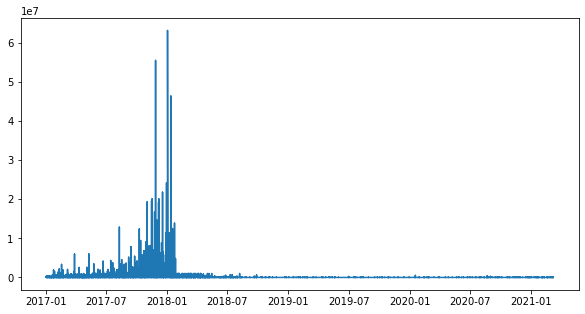

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(data["date_issue"], data["amount"])

##### *Plot looks normal from 09-2018 (currency reconversion), so we will trim the dataset and keep data from 09-2018 onwards*

## ✂ DATA TRIM

In [32]:
data_trim = data.loc[(data['date_issue'] >= datetime(2018, 9, 1))]

In [33]:
data_trim

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
170734,PAGADO,INDIVIDUAL,Laringitis Y Traqueitis Agudas,EMERGENCIA,CLINICA,Distrito Capital,F,48,29,26,2018-09-01,40-49,Ambulatorio
171773,PAGADO,INDIVIDUAL,Hepatitis Viral(A-B-C),EMERGENCIA,CLINICA,Distrito Capital,F,50,29,142,2018-09-01,50-59,Ambulatorio
167138,PAGADO,INDIVIDUAL,Amigdalo-Faringitis Aguda,EMERGENCIA,CLINICA,Zulia,M,42,29,21,2018-09-02,40-49,Ambulatorio
180517,PAGADO,INDIVIDUAL,Bronquitis Aguda,EMERGENCIA,CLINICA,Distrito Capital,F,59,29,311,2018-09-02,50-59,Hospitalización
149033,PAGADO,COLECTIVO,Dolor Abdominal Y Pelvico,EMERGENCIA,CLINICA,Miranda,F,47,29,14,2018-09-02,40-49,Ambulatorio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,PENDIENTE,INDIVIDUAL,Fiebre Del Dengue Clasico/Hemorragico,EMERGENCIA,CLINICA,Falcon,F,42,29,1351,2021-03-08,40-49,Hospitalización
151757,PENDIENTE,COLECTIVO,Infeccion Viral - Covid 19 Sospechoso,EMERGENCIA,CLINICA,Bolivar,F,27,29,609,2021-03-08,20-29,Ambulatorio
143438,PENDIENTE,COLECTIVO,Mordedura De Animales,EMERGENCIA,CLINICA,Sucre,F,28,29,54,2021-03-08,20-29,Ambulatorio
5098,PENDIENTE,INDIVIDUAL,Neumonia Bacteriana/Viral,EMERGENCIA,CLINICA,Monagas,M,48,29,4962,2021-03-08,40-49,Hospitalización


In [34]:
data.shape

(182856, 13)

### 📤 *#1 Exporting to excel: FULL_CLEAN_DATA*

In [53]:
# full_data_clean = data_trim.to_excel('../raw_data/full_data_clean.xlsx', engine='xlsxwriter')

## 📆 DAILY DATA

##### *Grouping data by days, each day will have only one row*

In [35]:
data_days = data_trim.groupby('date_issue', as_index = False).agg({'amount': 'sum'})

In [36]:
# Renaming columns
data_days.columns = ['date_issue','total_amount_claims']

In [37]:
data_days.head()

,date_issue,total_amount_claims
0,2018-09-01,168
1,2018-09-02,346
2,2018-09-03,16169
3,2018-09-04,28529
4,2018-09-05,64135


In [38]:
len(data_days)

920

In [39]:
data_days.shape

(920, 2)

In [41]:
data_days[['total_amount_claims']].describe()

,total_amount_claims
count,920.000000
mean,106419.338043
std,104644.635744
min,31.000000
25%,31063.250000
50%,76229.000000
75%,143763.250000
max,713904.000000


### 📈 *Some plots*

/home/lucila/.pyenv/versions/3.8.6/envs/Insurance_claiming_forecasting/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


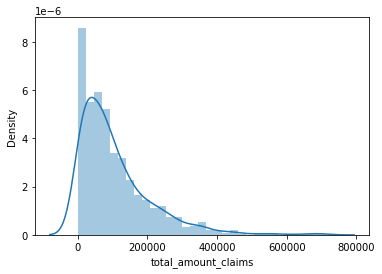

In [42]:
sns.distplot(data_days['total_amount_claims']);

<AxesSubplot:xlabel='total_amount_claims', ylabel='date_issue'>

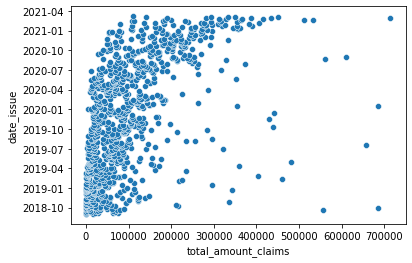

In [43]:
sns.scatterplot(x="total_amount_claims", y="date_issue", data=data_days)

### 📈 *Time series plots*

In [44]:
# Setting index as date
data_days_plotting = data_days.set_index('date_issue')

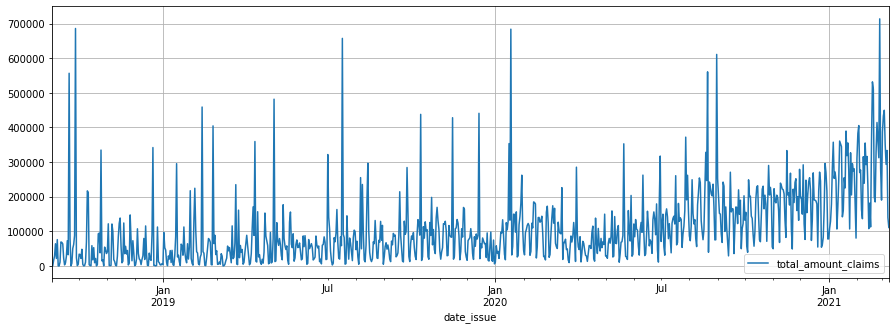

In [45]:
data_days_plotting.plot(grid=True, figsize=(15,5));

### 📤 *#2 Exporting to excel: DAILY_CLEAN_DATA*

In [74]:
# daily_data_clean = data_days.to_excel('../raw_data/daily_data_clean.xlsx', engine='xlsxwriter')

## 📅 WEEKLY DATA

In [46]:
data_weekly = data_days.resample('W-Mon', on='date_issue').sum().reset_index().sort_values(by='date_issue')

In [47]:
data_weekly

,date_issue,total_amount_claims
0,2018-09-03,16683
1,2018-09-10,201774
2,2018-09-17,263661
3,2018-09-24,799703
4,2018-10-01,900305
...,...,...
127,2021-02-08,1949930
128,2021-02-15,1725225
129,2021-02-22,2232202
130,2021-03-01,2666662


In [48]:
data_weekly.shape

(132, 2)

### 📤 *#3 Exporting to excel: WEEKLY_CLEAN_DATA*

In [67]:
# data_weekly = data_weekly.to_excel('../raw_data/weekly_data_clean.xlsx', engine='xlsxwriter')

##### *NOT USED*

In [76]:
# DATA WAS TRIMMED BEFORE SO NO NEED TO TRIM AGAIN
# Exchange rate difference before 09-2018 so we will trim the plot

# start_date = datetime(2018, 9, 1)
# end_date = datetime(2021, 3, 8)
# date_filter = (data_days_plotting.index >= start_date) & (data_days_plotting.index <= end_date)
# data_days_plotting[date_filter].plot(grid=True, figsize=(15,5))